# Inisiasi Kebutuhan library dan functions

In [2]:
# Import library

# library kebutuhan
import os
import datetime
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# library algoritma
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Macam macam algoritma
algorithm_pack = [[GaussianNB(), 'Naive Bayes', 'NB'],
                [KNeighborsClassifier(), 'K Nearest Neighbors', 'KNN'],
                [SVC(), 'Support Vector Machine', 'SVM'],
                [LogisticRegression(random_state=100), 'Logistic Regression', 'LR'],
                [GradientBoostingClassifier(random_state=100, learning_rate=0.125), 'Gradient Boosting', 'GB'],
                [DecisionTreeClassifier(random_state=100), 'Decision Tree', 'DT'],
                [RandomForestClassifier(random_state=100), 'Random Forest','RF'],
                [MLPClassifier(max_iter=1000), 'Multi-layer Perceptron', 'MLP']]

# Fungsi untuk menampilkan opsi algoritma apa yang ingin dipakai
def algorithm_option_string():
    string = ''
    for i in range(len(algorithm_pack)):
        string += f"\n{i}. {algorithm_pack[i][1]}"
    string += '\n['
    for i in range(len(algorithm_pack)):
        if(i == len(algorithm_pack) - 1):
            string+= f"{i}]: "
        else:
            string+= f"{i}/"
    return string

# Fungsi untuk print error dengan warna merah dan diberi jarak
def print_error(string):
    print("\n\033[91m"+string+"\033[0m\n")

# Fungsi untuk validasi input opsi integer
def get_integer_option(min_value, max_value, prompt):
    while True:
        try:
            value = int(input(prompt))
            if min_value <= value <= max_value:
                return value
            else:
                print_error(f"Option must be between {min_value} and {max_value}")
        except ValueError:
            print_error(f"Invalid option. Please enter a valid integer value between {min_value} and {max_value}")

def get_current_time(format=None):
    """Gets the current time in Python and optionally formats it.

    Args:
        format (str, optional): The desired format for the time string.
            Defaults to None, which returns the time in ISO 8601 format (YYYY-MM-DD HH:MM:SS).
            Common format codes include:
                - %Y: Year (e.g., 2024)
                - %m: Month (e.g., 02)
                - %d: Day of the month (e.g., 27)
                - %H: Hour in 24-hour format (e.g., 16)
                - %M: Minute (e.g., 58)
                - %S: Second (e.g., 24)
                - %f: Microseconds (e.g., 406569)

    Returns:
        str: The formatted current time string.
    """

    current_time = datetime.datetime.now()

    if format:
        return current_time.strftime(format)
    else:
        return current_time.isoformat()

current_time = get_current_time("%d-%m-%y_%H=%M=%S")
    
def remove_file(filename):
    if os.path.exists(filename):
        os.remove(filename)

# -- Baca data dan menyimpan data original

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
origin_test_data = test_data

# Melihat Info dari train data

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# -- Drop kolom yang tidak relevan dan set kolom yang ingin diprediksi

In [7]:
# Ganti isi dengan fitur yang sesuai dengan data
dropped_columns = ['PassengerId', 'HomePlanet', 'Destination', 'Age', 'VIP', 'Name', 'CryoSleep']
target_column = 'Transported'

categorical_features = train_data.drop(columns=dropped_columns + [target_column]).select_dtypes(include=['object']).columns.tolist()
numerical_features = train_data.drop(columns=dropped_columns + [target_column]).select_dtypes(exclude=['object']).columns.tolist()

train_data = train_data.drop(columns=dropped_columns)
test_data = test_data.drop(columns=dropped_columns)

# Melihat kembali apakah fitur kategorikal dan fitur numerikal sudah benar

In [8]:
print(categorical_features)
print(numerical_features)

['Cabin']
['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


# -- Fungsi untuk imputasi nilai yang bersifat null lalu skalarisasi standar

In [9]:
# Ini adalah fungsi transformasi yang digunakan untuk fitur kategorikal non ordinal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(sparse_output=False).set_output(transform='pandas'))
])  # OneHotEncoder mengubah kategorikal menjadi biner (numerikal)

# Ini adalah fungsi transformasi yang digunakan untuk fitur numerikal non ordinal
numerical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # Mengisi null value dengan data median
    ('scaler', StandardScaler())                    # Melakukan standarisasi skalar
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_imputer, numerical_features)
    ], remainder='passthrough')

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# -- Mulai memisah menjadi x_train, y_train, dan x_test (tidak perlu y_test karena yang diminta hasil prediksi bukan akurasi)

In [10]:
from sklearn.model_selection import train_test_split
x_train_visualize = train_data
x_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]
x_test = test_data
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=69)

In [11]:
# models=[]
# names=[]
# results=[]
# itr = len(algorithm_pack)
# for i in range(len(algorithm_pack)):
#     # names.append(algorithm_pack[i](2))
#     models.append(algorithm_pack[i][0])
# for name, model in models:
#     kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#     cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
#     results.append(cv_results)
#     names.append(name)
#     print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


In [12]:
# Fungsi buat ngambil huruf S sama P di Side
def extract_last_cabin_part(s):
    if isinstance(s, str):
        parts = s.split('/')
        return parts[-1]
    else:
        return s

# def convert_to_numeric(label):
#   if label == 'S':
#     # Handle 'S' appropriately (e.g., impute, drop, assign a specific value)
#     return -1  # Example: Replace with appropriate value or handling
#   else:
#     return 1


x_train_visualize['Cabin'] = x_train_visualize['Cabin'].apply(extract_last_cabin_part)
x_train['Cabin'] = x_train['Cabin'].apply(extract_last_cabin_part)
x_test['Cabin'] = x_test['Cabin'].apply(extract_last_cabin_part)
# print(y_test)
# y_test = [convert_to_numeric(label) for label in y_test]

In [13]:
# results=[]
# for i in range (len(algorithm_pack)):
#     kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#     cv_results = cross_val_score(algorithm_pack[i][0], X_train, x_train, cv=kfold, scoring='accuracy')
#     results.append(cv_results)
#     print('%s: %f (%f)' % (algorithm_pack[i][2], cv_results.mean(), cv_results.std()))

In [14]:
x_train_visualize = pipeline.fit_transform(x_train_visualize)
x_train = pipeline.fit_transform(x_train)
# y_train = pipeline.fit_transform(y_train)
x_test = pipeline.transform(x_test)

if (len(categorical_features) > 0):
    encoded_categorical_columns = pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)
    all_column_names = list(encoded_categorical_columns) + numerical_features
else:
    all_column_names = numerical_features

In [15]:
algorithm_pack_2 = [[GaussianNB(), 'Naive Bayes', 'NB'],
                [KNeighborsClassifier(), 'K Nearest Neighbors', 'KNN'],
                [SVC(), 'Support Vector Machine', 'SVM'],
                [GradientBoostingClassifier(random_state=100, learning_rate=0.125), 'Gradient Boosting', 'GB'],
                [DecisionTreeClassifier(random_state=100), 'Decision Tree', 'DT']]

results=[]
for i in range (len(algorithm_pack_2)):
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(algorithm_pack_2[i][0], x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    print('%s: %f (%f)' % (algorithm_pack_2[i][2], cv_results.mean(), cv_results.std()))

NB: 0.671345 (0.010623)
KNN: 0.704814 (0.074246)
SVM: 0.791209 (0.011370)
GB: 0.791441 (0.012189)
DT: 0.744965 (0.014792)


['Cabin_P', 'Cabin_S', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


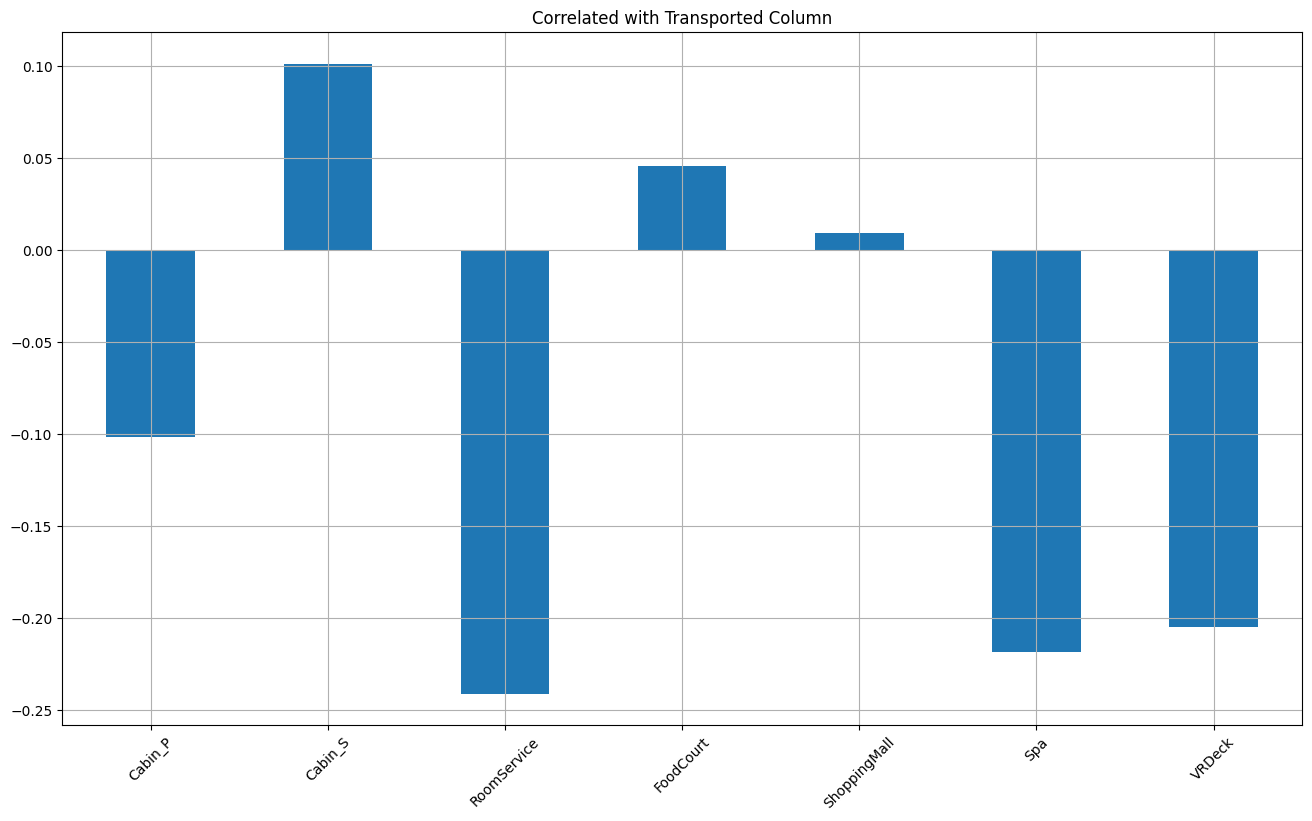

In [16]:
x_train_visualize_df = pd.DataFrame(x_train_visualize)
x_train_df = pd.DataFrame(x_train)
x_train_df.columns = all_column_names
x_train_visualize_df.columns = all_column_names + [target_column]
x_train_df.corrwith(train_data[target_column]).plot.bar(figsize=(16,9), title=f'Correlated with {target_column} Column', rot=45,grid=True)
print(all_column_names)

<Axes: >

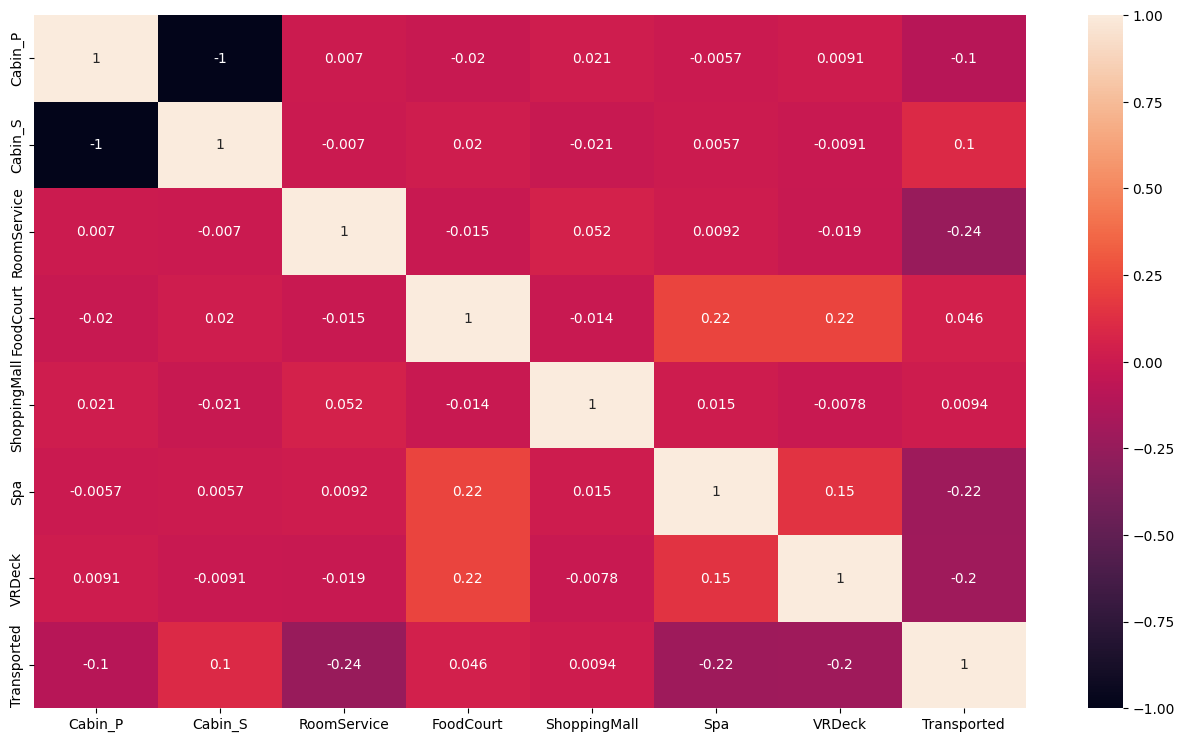

In [17]:
corr = x_train_visualize_df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [18]:
x_train

array([[ 1.        ,  0.        , -0.33310466, ..., -0.28357863,
        -0.2706259 , -0.26300329],
       [ 0.        ,  1.        , -0.16807343, ..., -0.24177071,
         0.21715825, -0.22420468],
       [ 0.        ,  1.        , -0.2680006 , ..., -0.28357863,
         5.69562289, -0.21979574],
       ...,
       [ 0.        ,  1.        , -0.33310466, ...,  2.84699872,
        -0.26973741, -0.26300329],
       [ 0.        ,  1.        , -0.33310466, ..., -0.28357863,
         0.04301309,  2.58957649],
       [ 0.        ,  1.        , -0.14233462, ..., -0.28357863,
        -0.2706259 , -0.25242185]])

In [19]:
x_test

array([[ 0.        ,  1.        , -0.33310466, ..., -0.28357863,
        -0.2706259 , -0.26300329],
       [ 0.        ,  1.        , -0.33310466, ..., -0.28357863,
         2.23759753, -0.26300329],
       [ 0.        ,  1.        , -0.33310466, ..., -0.28357863,
        -0.2706259 , -0.26300329],
       ...,
       [ 1.        ,  0.        , -0.33310466, ..., -0.28357863,
        -0.2706259 , -0.26300329],
       [ 1.        ,  0.        , -0.33310466, ..., -0.28357863,
        -0.2706259 ,  0.19817112],
       [ 0.        ,  1.        , -0.33310466, ..., -0.28357863,
        -0.2706259 , -0.26300329]])

In [20]:
def calculate_confusion_matrix(y_test, predictions):
  """
  This function calculates the confusion matrix for a given set of true labels and predictions.

  Args:
      y_test (list): A list of true labels.
      predictions (list): A list of predicted labels.

  Returns:
      confusion_matrix (dict): A dictionary containing the confusion matrix elements.
  """
  from sklearn.metrics import confusion_matrix

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, predictions)
  cm_dict = {}
  cm_dict['TP'] = cm[0][0]  # True Positives
  cm_dict['TN'] = cm[1][1]  # True Negatives
  cm_dict['FP'] = cm[0][1]  # False Positives
  cm_dict['FN'] = cm[1][0]  # False Negatives

  return cm_dict

In [21]:
algorithm_pack = [[GaussianNB(), 'Naive Bayes', 'NB'],
                [KNeighborsClassifier(), 'K Nearest Neighbors', 'KNN'],
                [SVC(), 'Support Vector Machine', 'SVM'],
                [LogisticRegression(random_state=100), 'Logistic Regression', 'LR'],
                [GradientBoostingClassifier(random_state=100, learning_rate=0.125), 'Gradient Boosting', 'GB'],
                [DecisionTreeClassifier(random_state=100), 'Decision Tree', 'DT'],
                [RandomForestClassifier(random_state=100), 'Random Forest','RF'],
                [MLPClassifier(max_iter=1000), 'Multi-layer Perceptron', 'MLP']]

In [ ]:
predictions = algorithm_pack[0][0].predict(x_test) #NB
predictions = algorithm_pack[1][0].predict(x_test) #KNN
predictions = algorithm_pack[4][0].predict(x_test) #GB
predictions = algorithm_pack[5][0].predict(x_test) #DT

In [32]:
algorithm_pack[5][0].fit(x_train, y_train)
predictions = algorithm_pack[5][0].predict(x_test) #KNN

In [33]:
print(predictions)

[ True False  True ...  True  True  True]


# -- Fungsi untuk output csv, diganti berdasarkan kebutuhan

## Fungsi untuk prediksi bersifat non probabilitas

In [ ]:
def output_one_csv(i):
    algorithm_pack[i][0].fit(x_train, y_train)
    predictions = algorithm_pack[i][0].predict(x_test)
    ids = origin_test_data['PassengerId']
    output_df = pd.DataFrame({'PassengerId': ids, 'Transported': predictions})
    output_csv_name = f"predictions_{algorithm_pack[i][2]}_{current_time}.csv"
    output_df.to_csv(output_csv_name, index=False)
    confusion_matrix = calculate_confusion_matrix(y_test, predictions)
    print(confusion_matrix)
    # accuracy = accuracy_score(y_test, predictions)
    # accuracy = accuracy_score(y_test,predictions)
    # print(accuracy)

    # Algoritma untuk output data yang dipakai untuk melatih model
    clean_data_df = pd.DataFrame(x_train)
    clean_data_df.columns = all_column_names
    clean_data_csv_name = f"clean_data_{algorithm_pack[i][2]}_{current_time}.csv"
    clean_data_df.to_csv(clean_data_csv_name, index=False)

    # Algoritma untuk output dokumentasi seperti permasalahan yang diselesaikan, waktu run code, dll.
    documentation_txt_name = f"documentation_{algorithm_pack[i][2]}_{current_time}.txt"
    current_ipynb_file = "STPv3.ipynb"
    string_to_write = ""
    with open(documentation_txt_name, "w") as f:
        # Write your documentation content to the file
        string_to_write += f"Problem to solve\t\t: {os.path.basename(os.getcwd())}\n"
        string_to_write += f"Date and Time file created\t: {get_current_time()}\n"
        # string_to_write += f"Accuracy :\t: {accuracy}\n"
        string_to_write += f"\nConfusion Matrix:\n{confusion_matrix}"
        string_to_write += f"Algorithm title\t\t\t: {algorithm_pack[i][1]}\n\n"
        string_to_write += f"Training data info:\n{train_data.dtypes}\n\n"
        string_to_write += f"Test data info:\n{test_data.dtypes}\n\n"
        string_to_write += f"Categorical Features\t: {categorical_features}\n"
        string_to_write += f"Numerical Features\t: {numerical_features}\n\n"
        string_to_write += f"For more data details see {clean_data_csv_name} (data that are beeing trained)\n"
        string_to_write += f"For data preprocessing details see {current_ipynb_file} or self\n"
        f.write(string_to_write)

    with zipfile.ZipFile(f"complete_data_{algorithm_pack[i][2]}_{current_time}.zip", "w") as zip_file:
        # Add the current code into the zip
        zip_file.write(current_ipynb_file, arcname=current_ipynb_file)
        # Add the CSV file
        zip_file.write(output_csv_name, arcname=output_csv_name)  # Specify archive name for the CSV
        zip_file.write(clean_data_csv_name, arcname=clean_data_csv_name)  # Specify archive name for the CSV
        # Add the text file
        zip_file.write(documentation_txt_name, arcname=documentation_txt_name)  # Specify archive name for the text file
        remove_file(clean_data_csv_name)
        remove_file(documentation_txt_name)

# -- Fungsi untuk output semua model yang dipakai

In [ ]:
def output_all_csv():
    for i in range(len(algorithm_pack)):
        output_one_csv(i)

def output_mandatory_csv():
     for i in range(3):
        output_one_csv(i)

# -- Memudahkan untuk outputnya

In [ ]:
# choose = get_integer_option(0, 2, "What do you want to do with the csv?\n0. Train the csv data\n1. Get the info of the csv data\n2. Get the csv of clean preprocessed data\n[0/1/2]: ")
choose = 0
if(choose == 0):
    # choose = get_integer_option(0, 2, "Use all model?\n0. No\n1. Yes\n2. Mandatory\n[0/1/2]: ")
    choose = 1
    if(choose == 0):
        # choose = get_integer_option(0, len(algorithm_pack) - 1, f"Which model to use?"+algorithm_option_string())
        choose = 4
        output_one_csv(choose)
    elif(choose == 1):
        output_all_csv()
    elif(choose == 2):
        output_mandatory_csv()
elif(choose == 1):
    print("Training data info:\n",train_data.dtypes,"\n")
    print("Test data info:\n",test_data.dtypes)
    print("Categorical Features: ",categorical_features)
    print("Numerical Features: ",numerical_features)

elif(choose == 2):
    clean_data_df = pd.DataFrame(x_train)
    clean_data_df.columns = all_column_names
    clean_data_df.to_csv('clean_data.csv', index=False)

ValueError: Found input variables with inconsistent numbers of samples: [8693, 6954]

In [ ]:
# Run All0